In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from scipy import stats
from scipy.stats import norm
from scipy import stats
from scipy.stats import zscore ,skew
from scipy.stats.mstats import normaltest

import matplotlib.gridspec as gridspec
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.duplicated().sum()

12

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
categorical_data = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(include=['float64','int64']).columns

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 



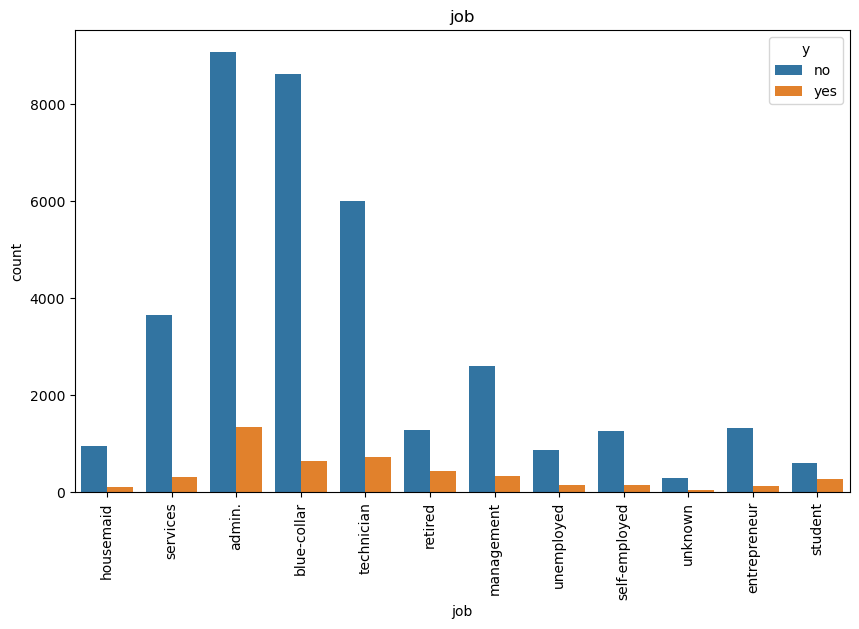

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64 



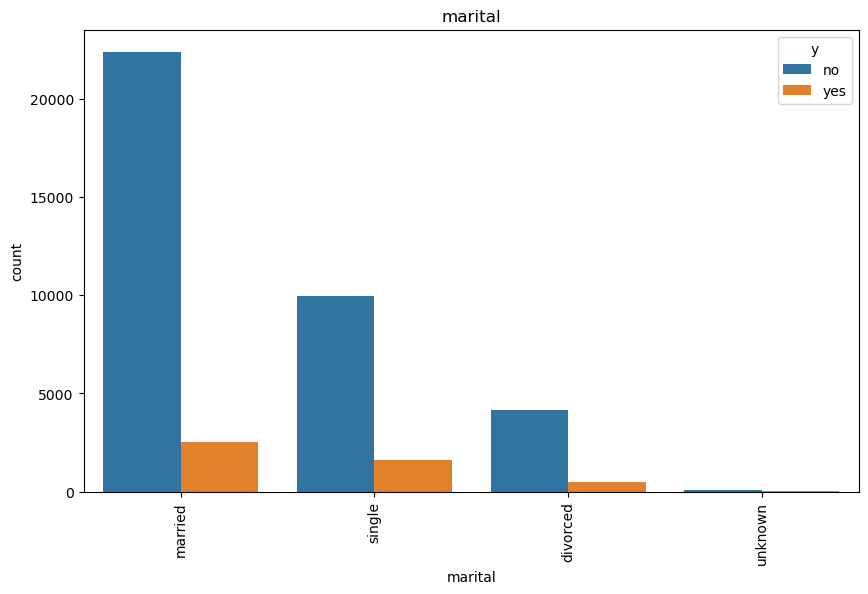

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64 



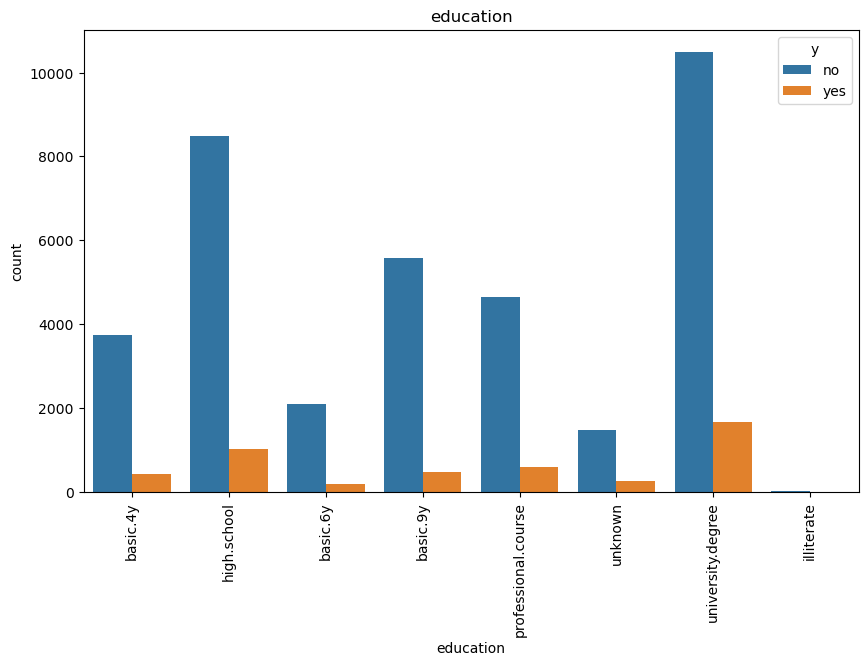

no         32577
unknown     8596
yes            3
Name: default, dtype: int64 



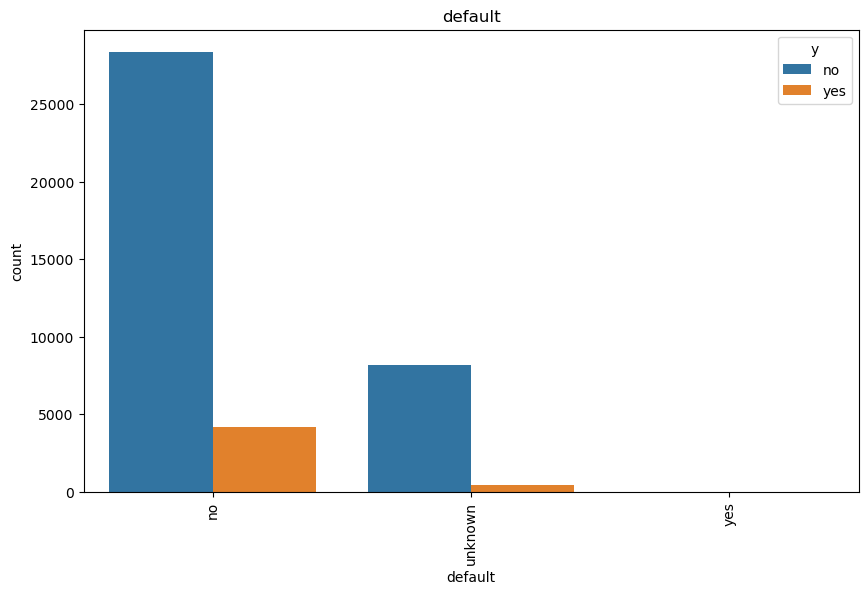

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64 



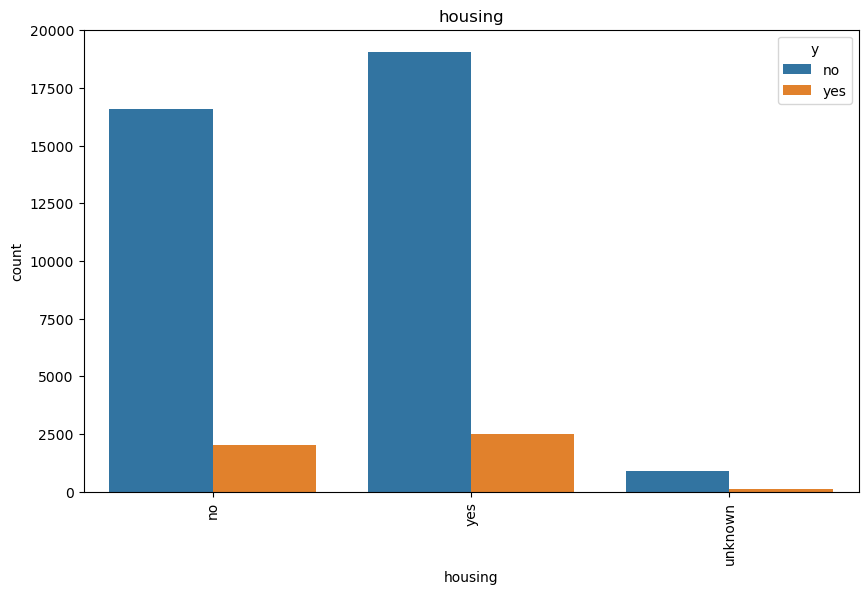

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64 



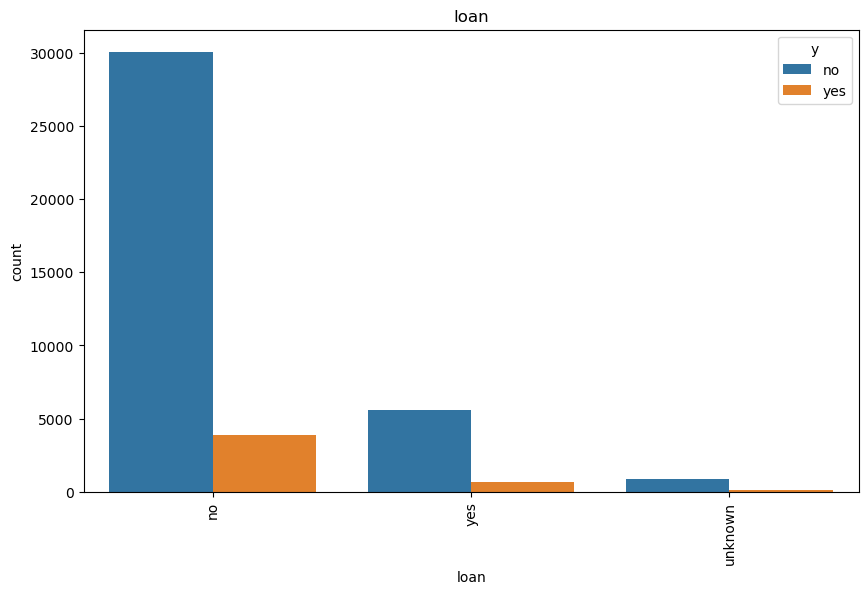

cellular     26135
telephone    15041
Name: contact, dtype: int64 



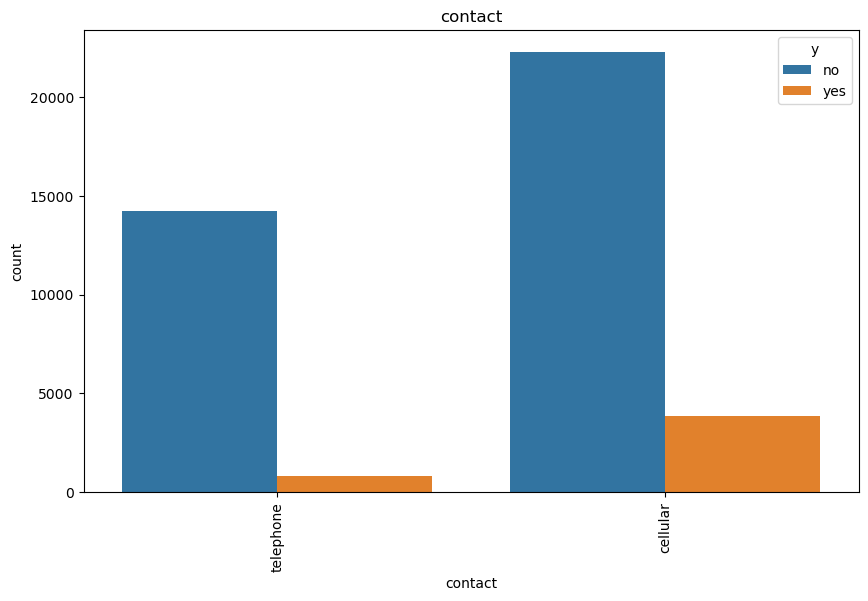

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64 



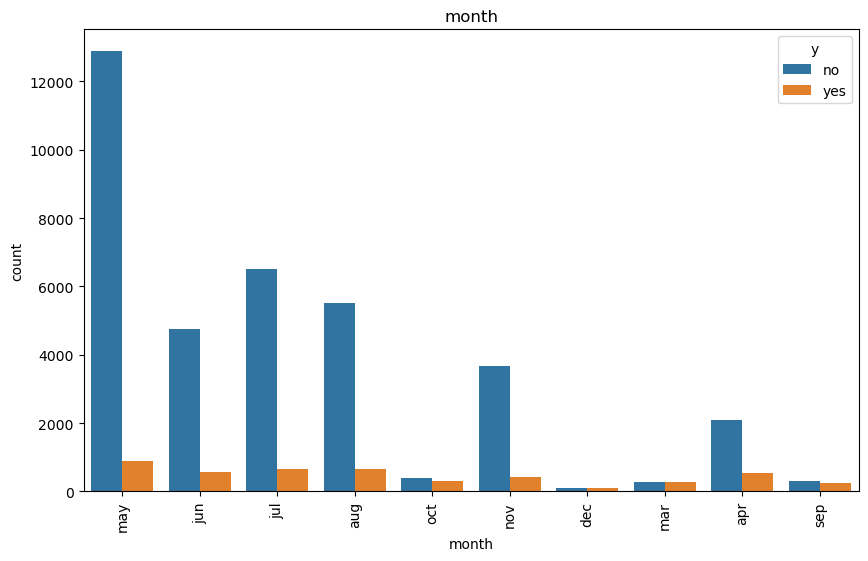

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64 



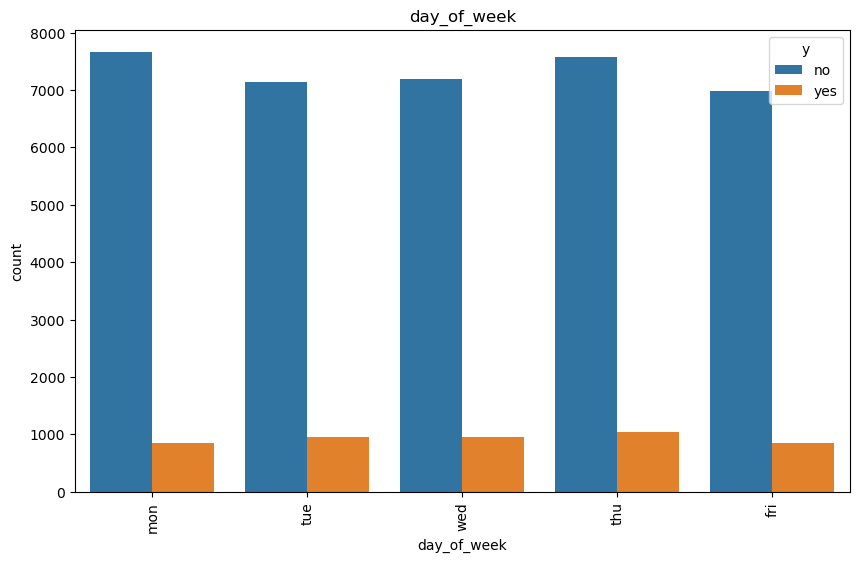

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64 



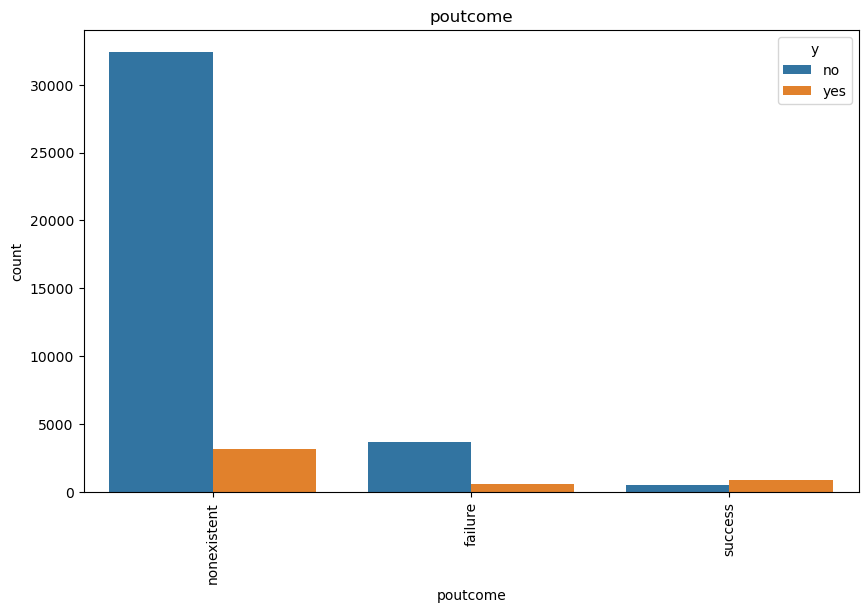

no     36537
yes     4639
Name: y, dtype: int64 



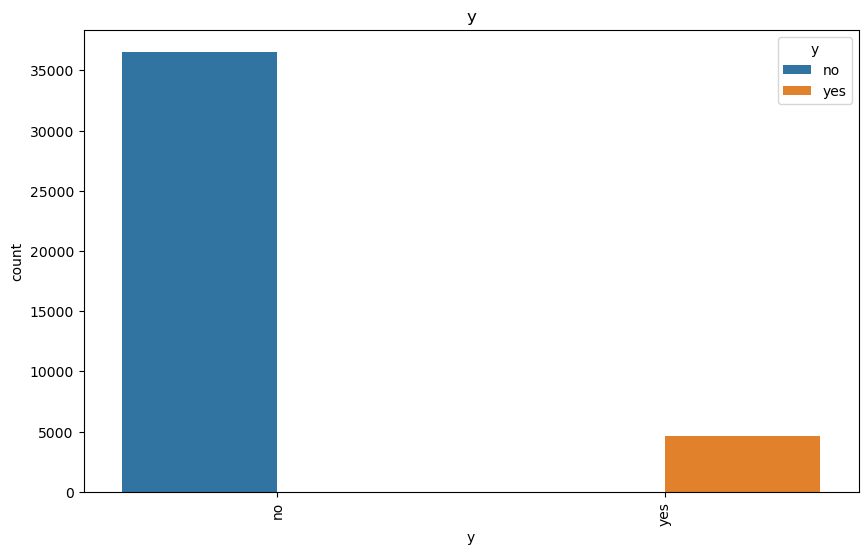

In [11]:
for column in categorical_data:
    print(df[column].value_counts(), '\n')
    plt.figure(figsize=(10, 6))  
    sns.countplot(x=column, data=df , hue = 'y')
    plt.xticks(rotation=90)  
    plt.title(column)  
    plt.show()

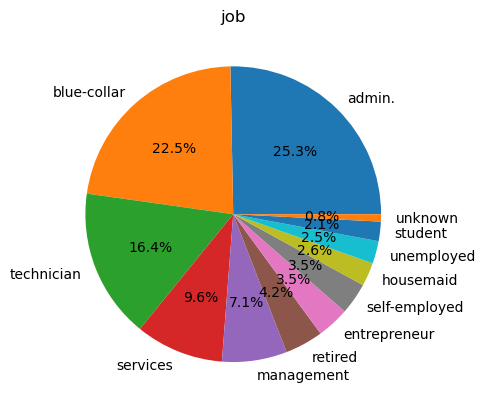

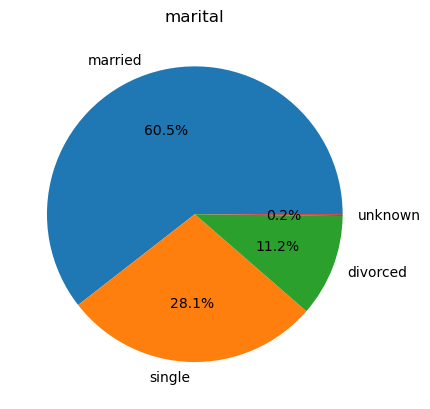

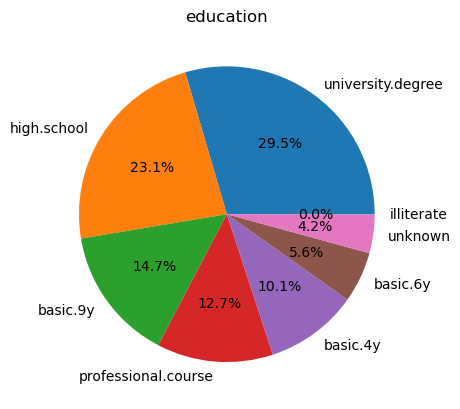

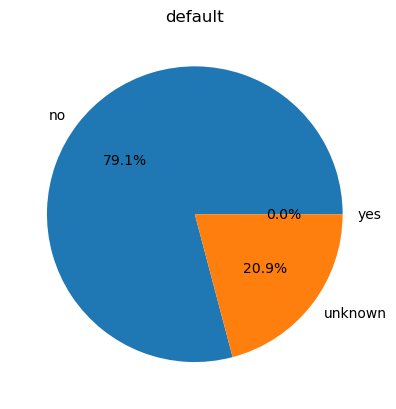

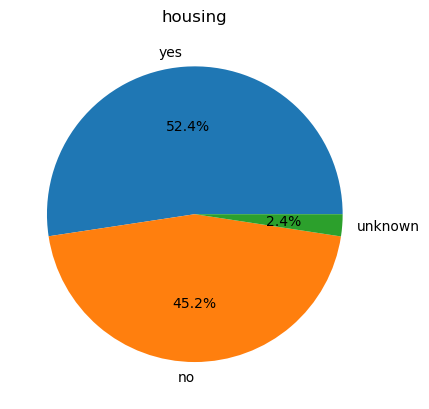

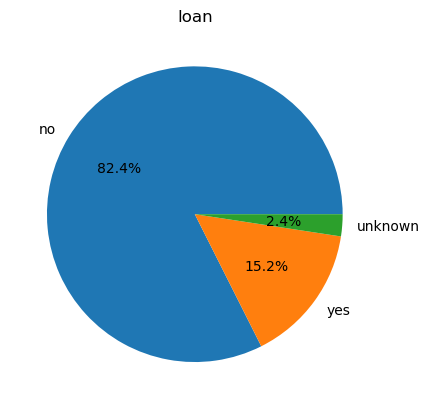

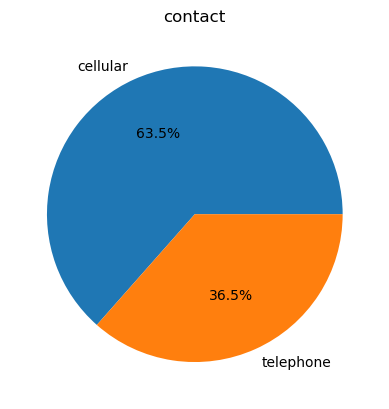

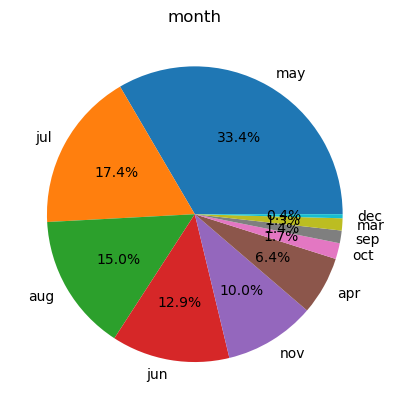

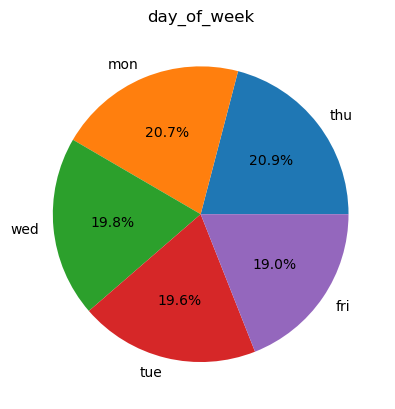

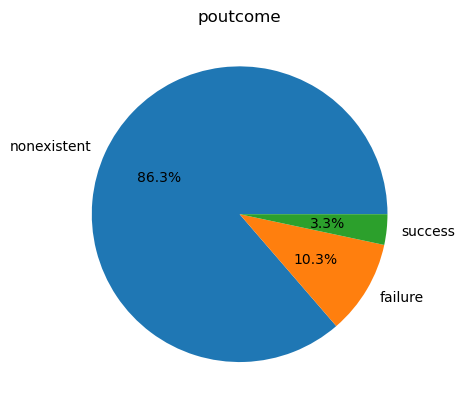

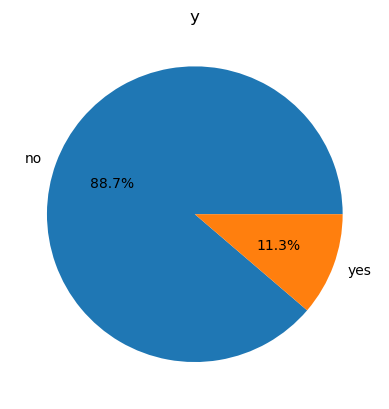

In [12]:
for column in categorical_data:
    percentage = (df[column].value_counts() * 100) / len(df)
    values = df[column].value_counts().values
    labels = df[column].value_counts().index
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title(column)  
    plt.show()

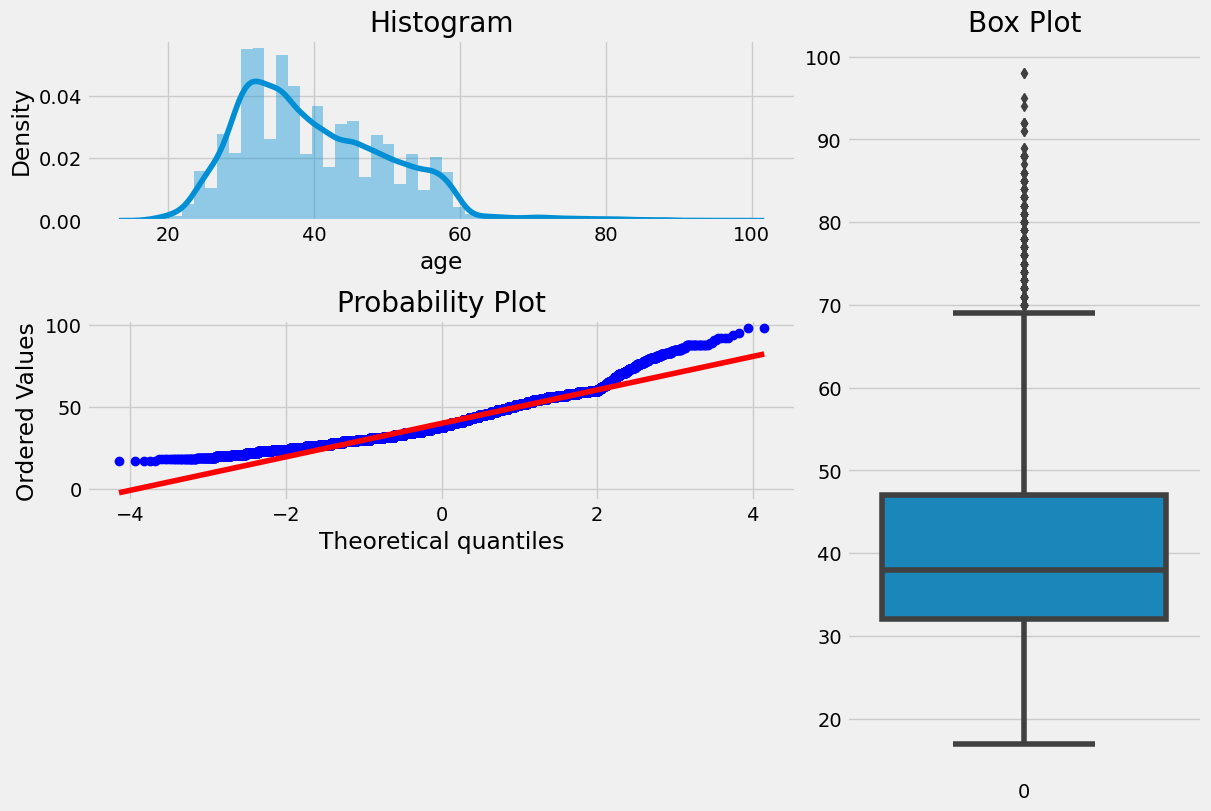

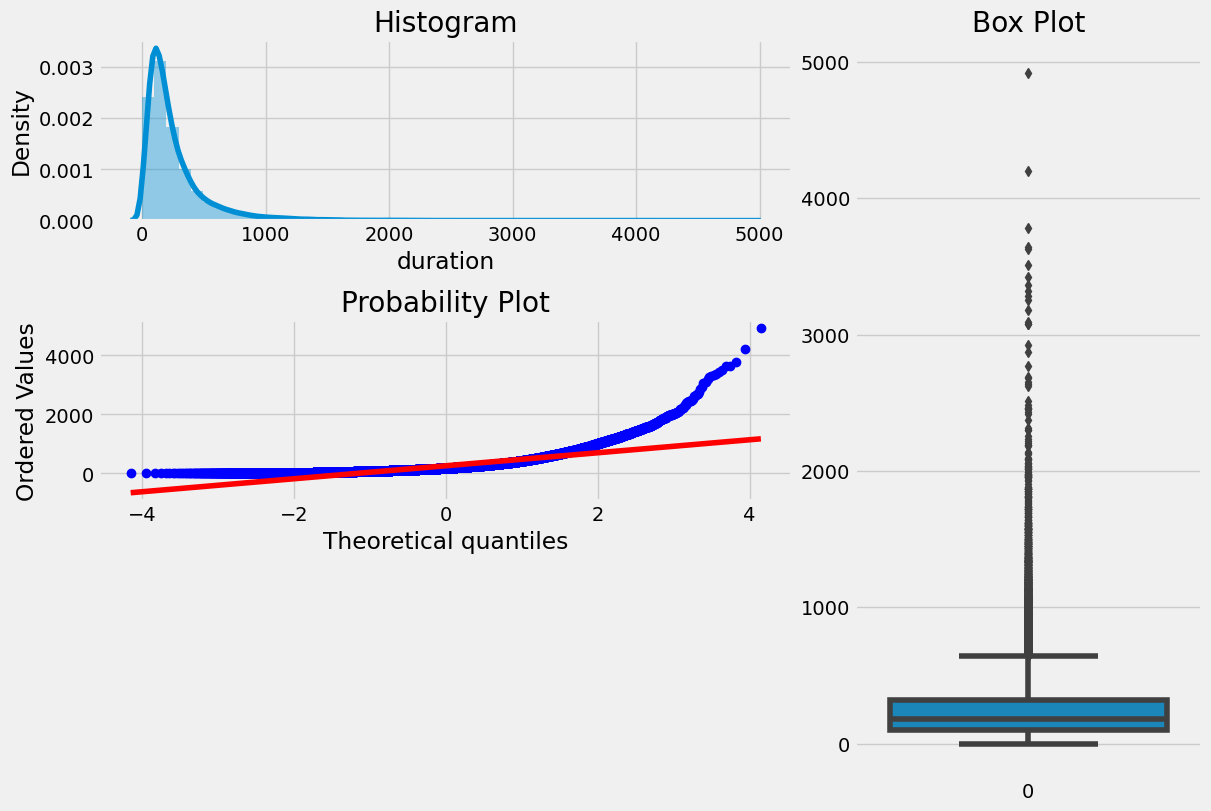

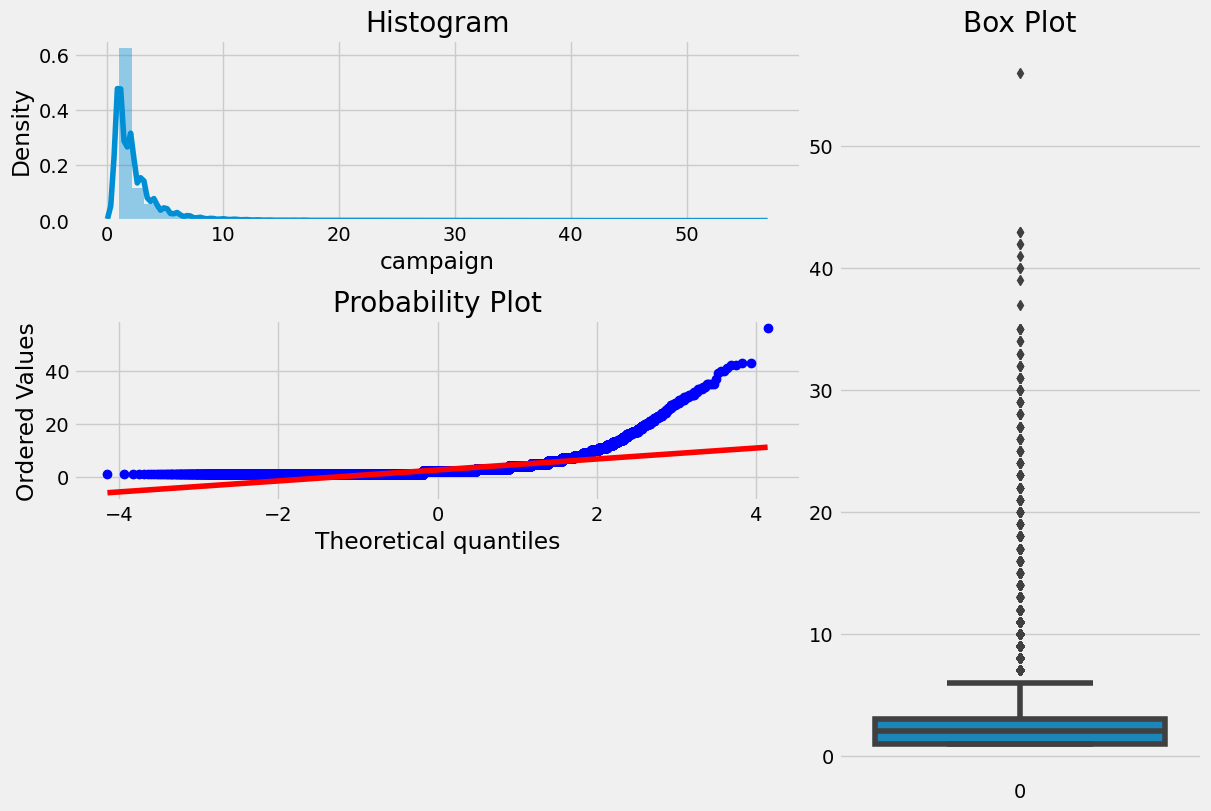

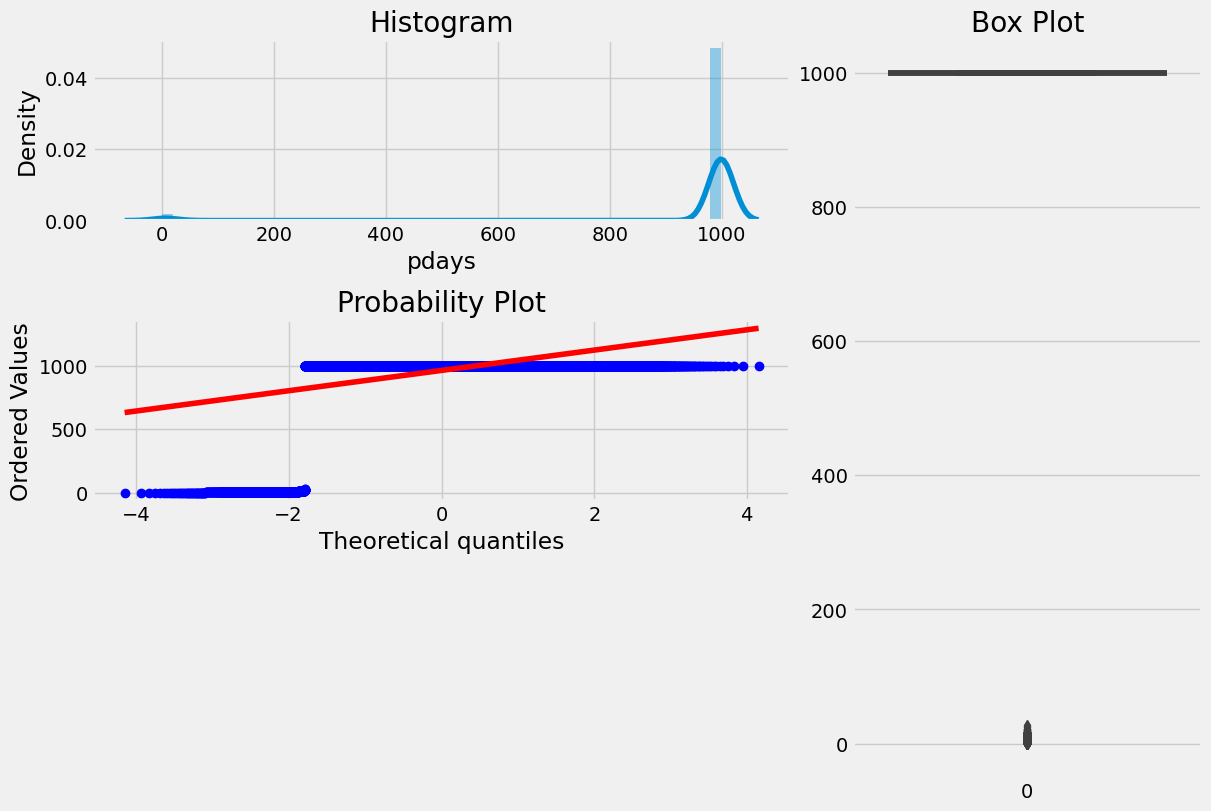

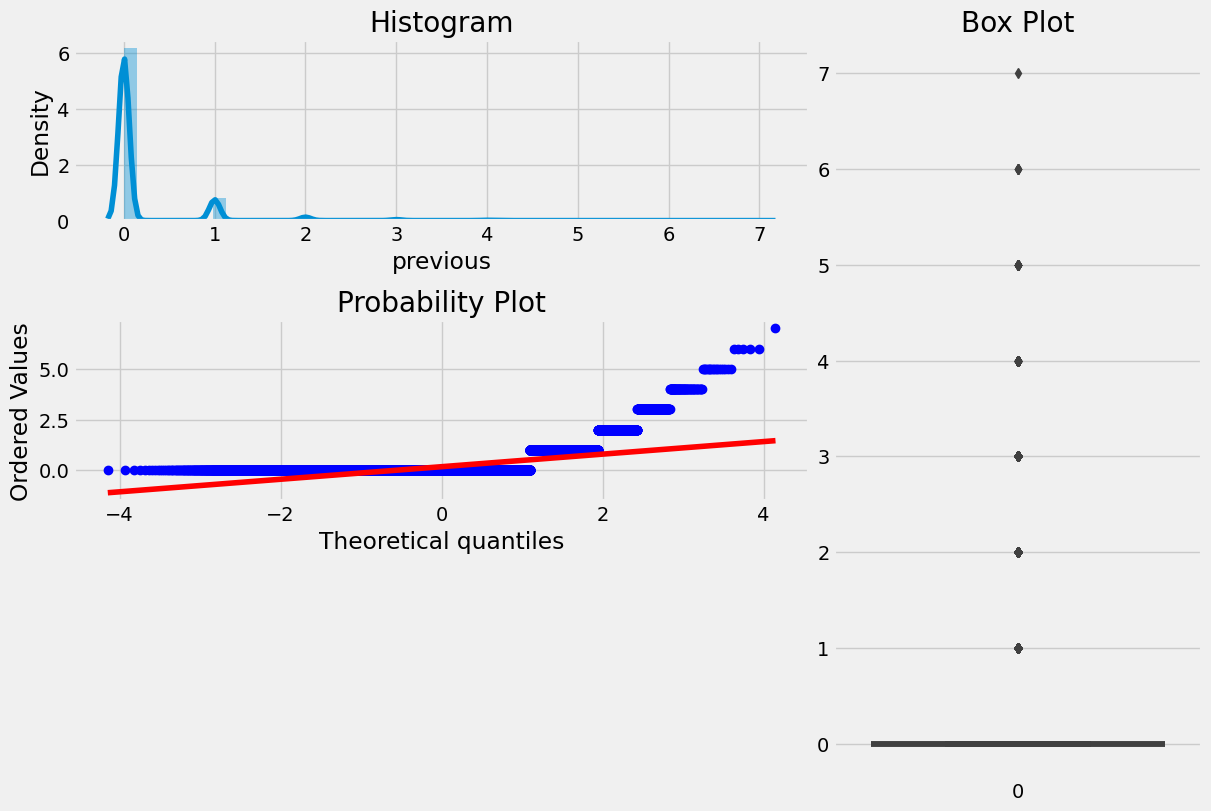

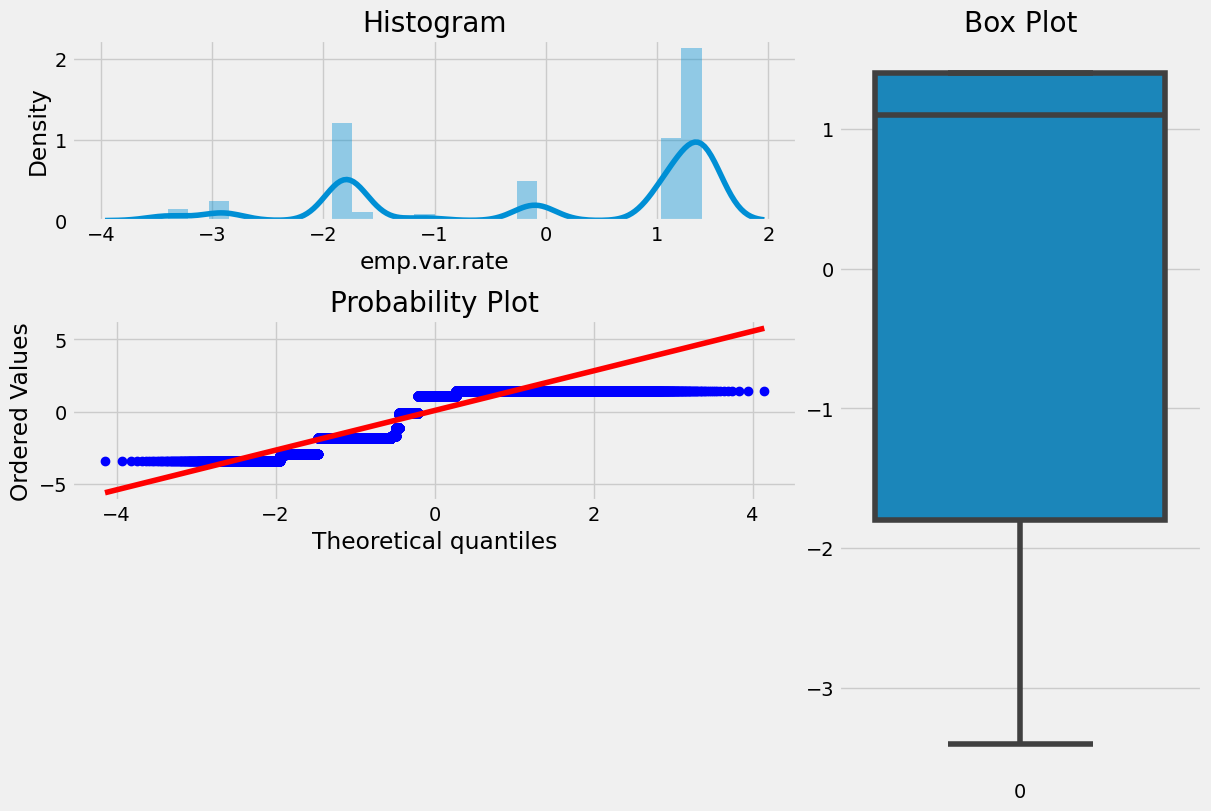

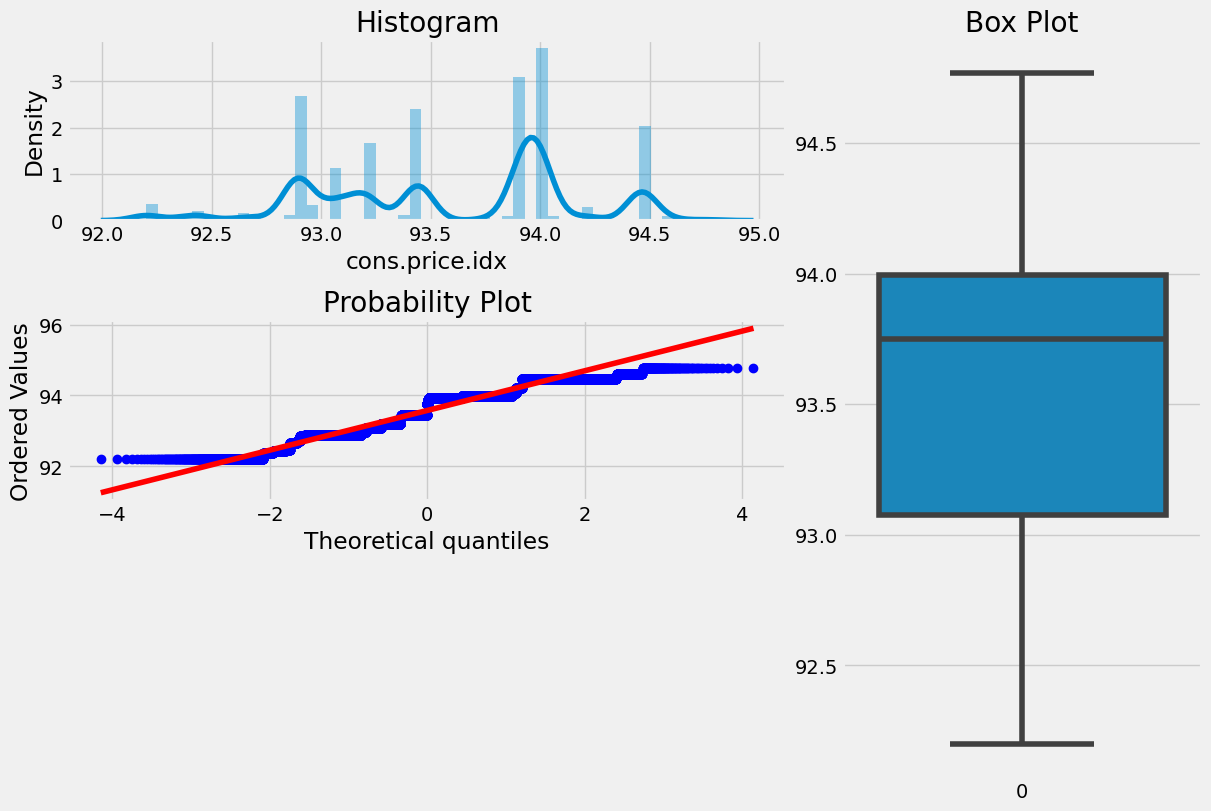

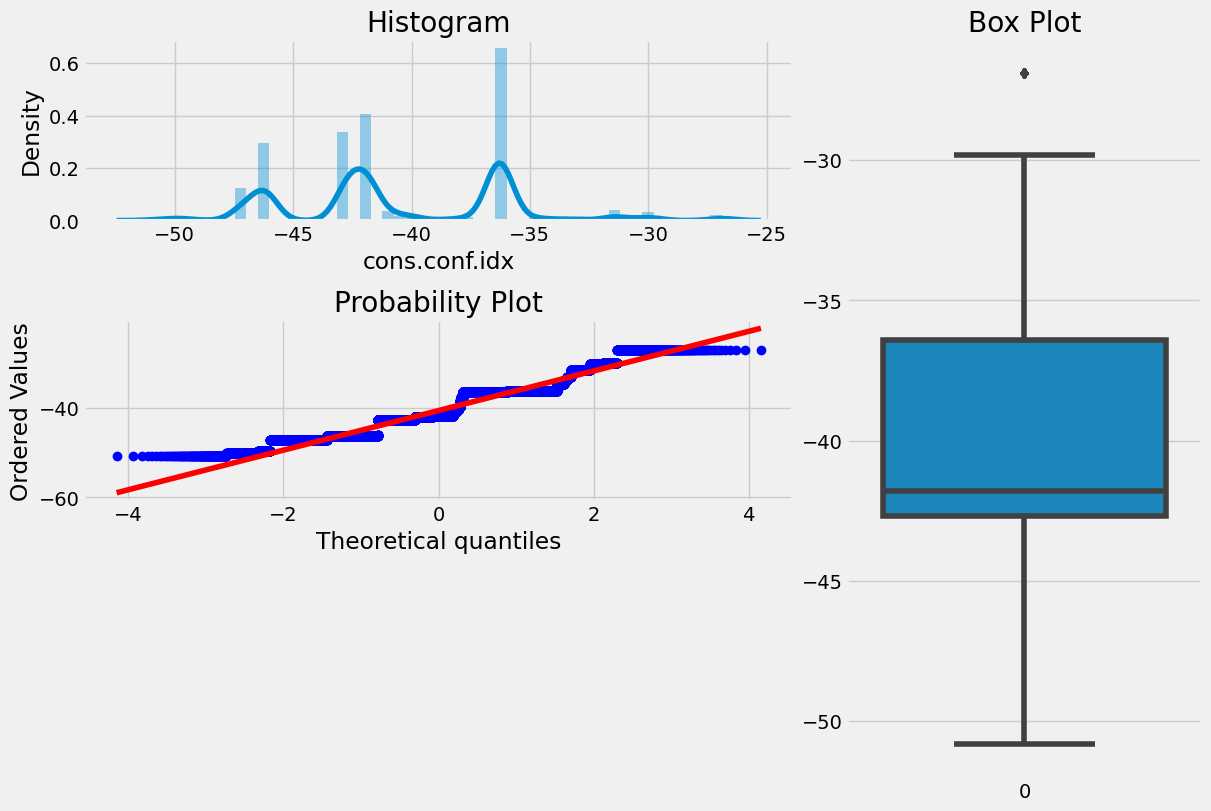

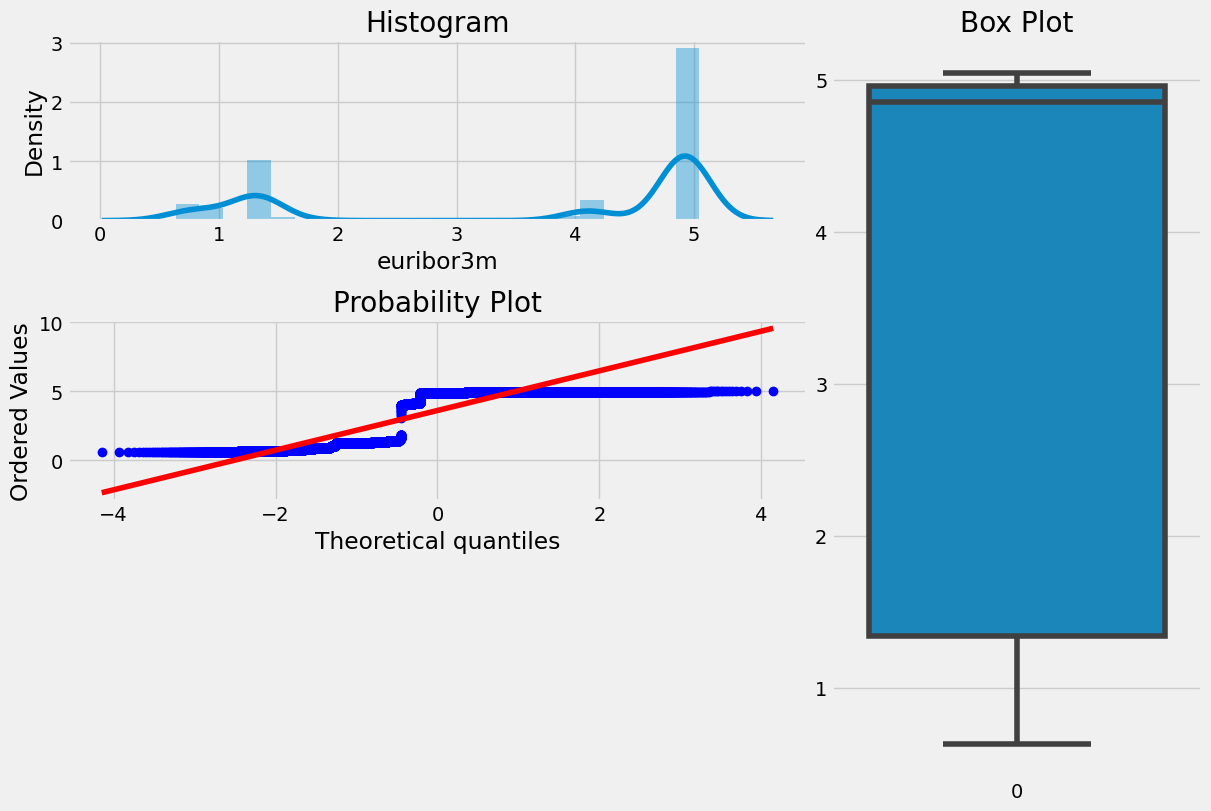

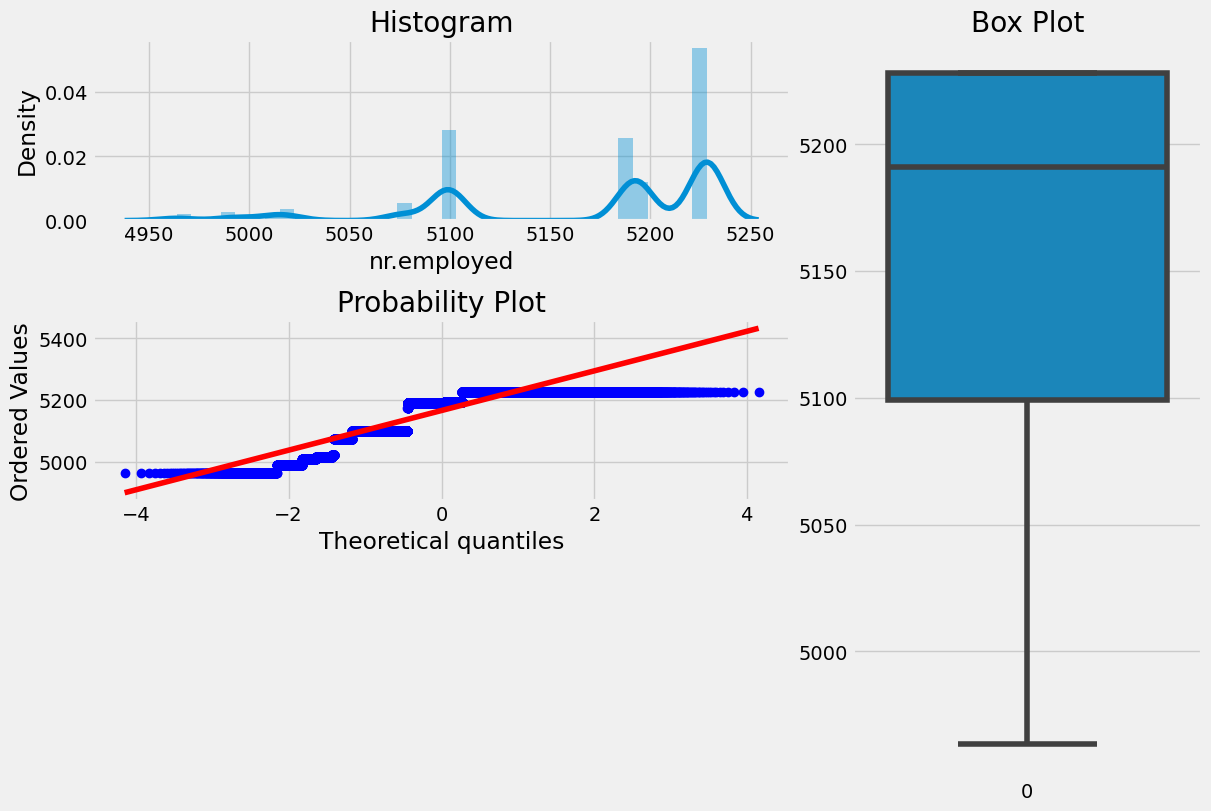

In [13]:
def plotting_3_chart(data, feature):
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot( data.loc[: , feature]  , ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)
    
    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);

for i in numerical_features:
    plotting_3_chart(df , i)
    print('\n\n')

In [14]:
# Removing outliers
zscore_data = df[numerical_features].apply(zscore)
threhold = 3
outliers = (zscore_data.abs() > threhold ).any(axis = 1)
df = df[~outliers]

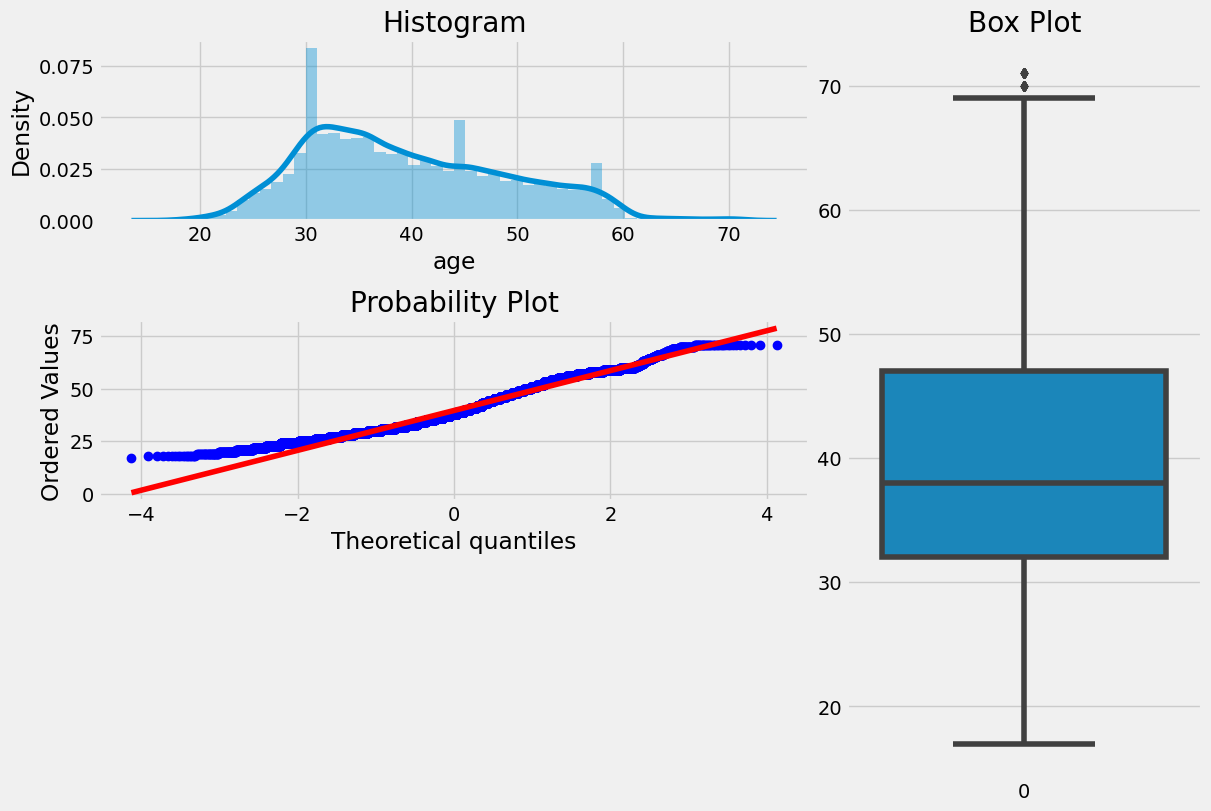

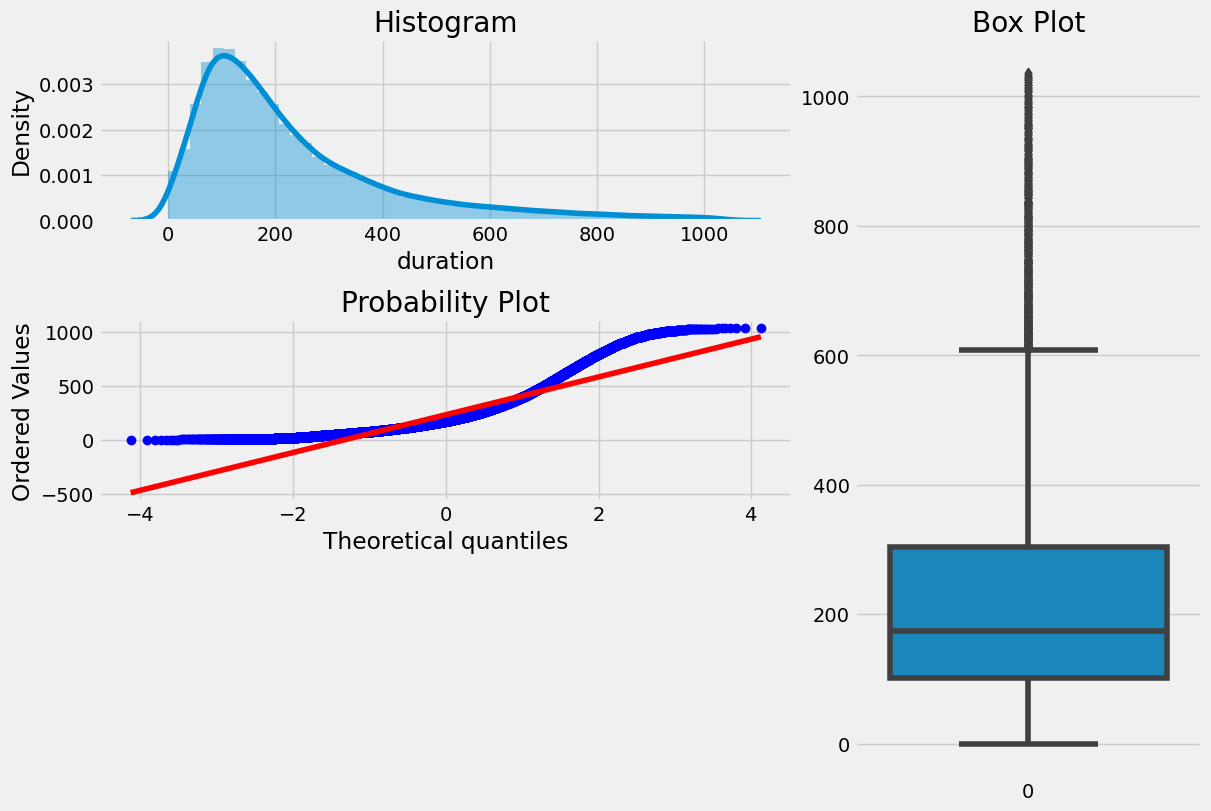

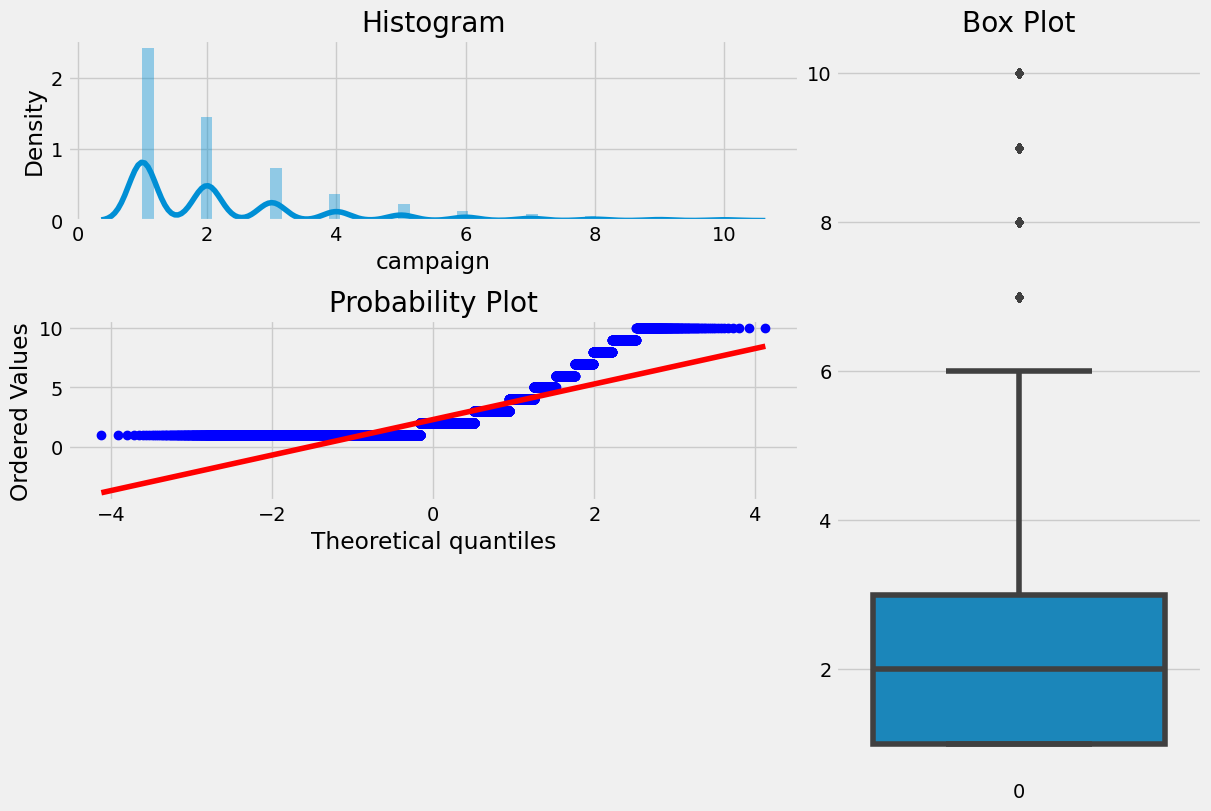

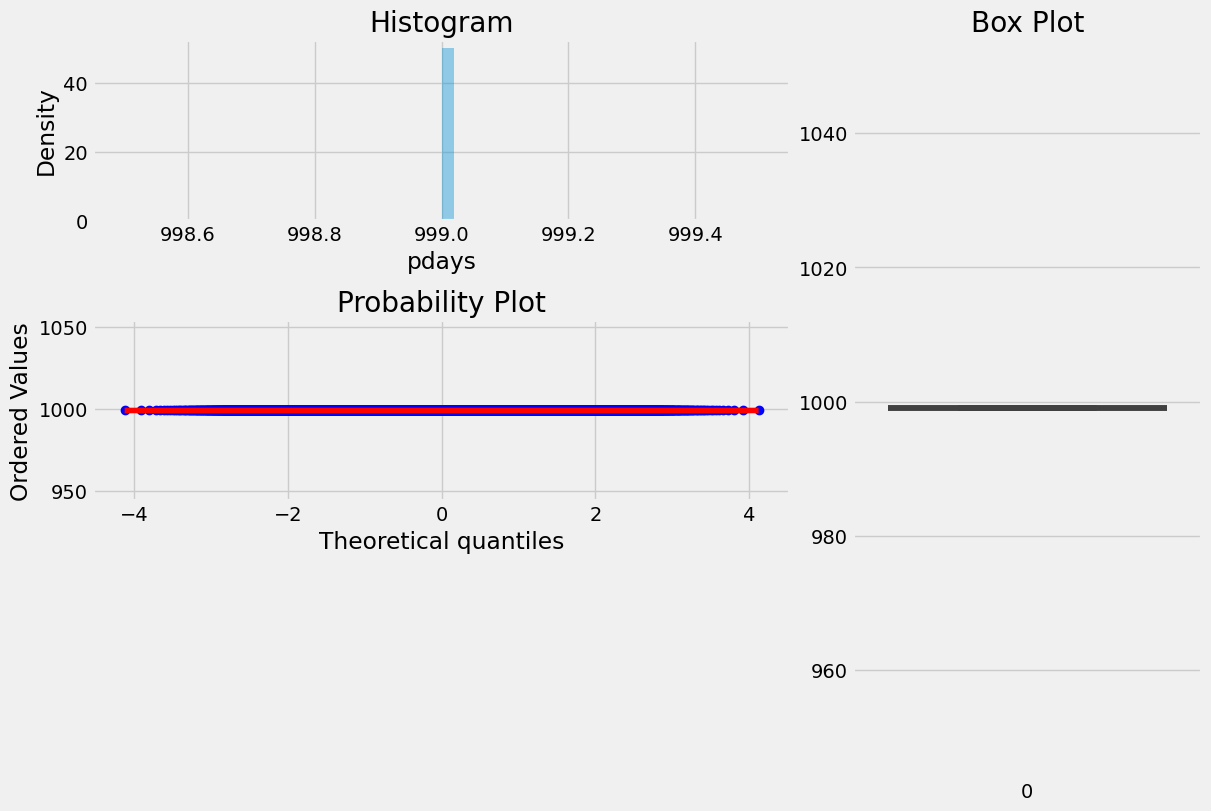

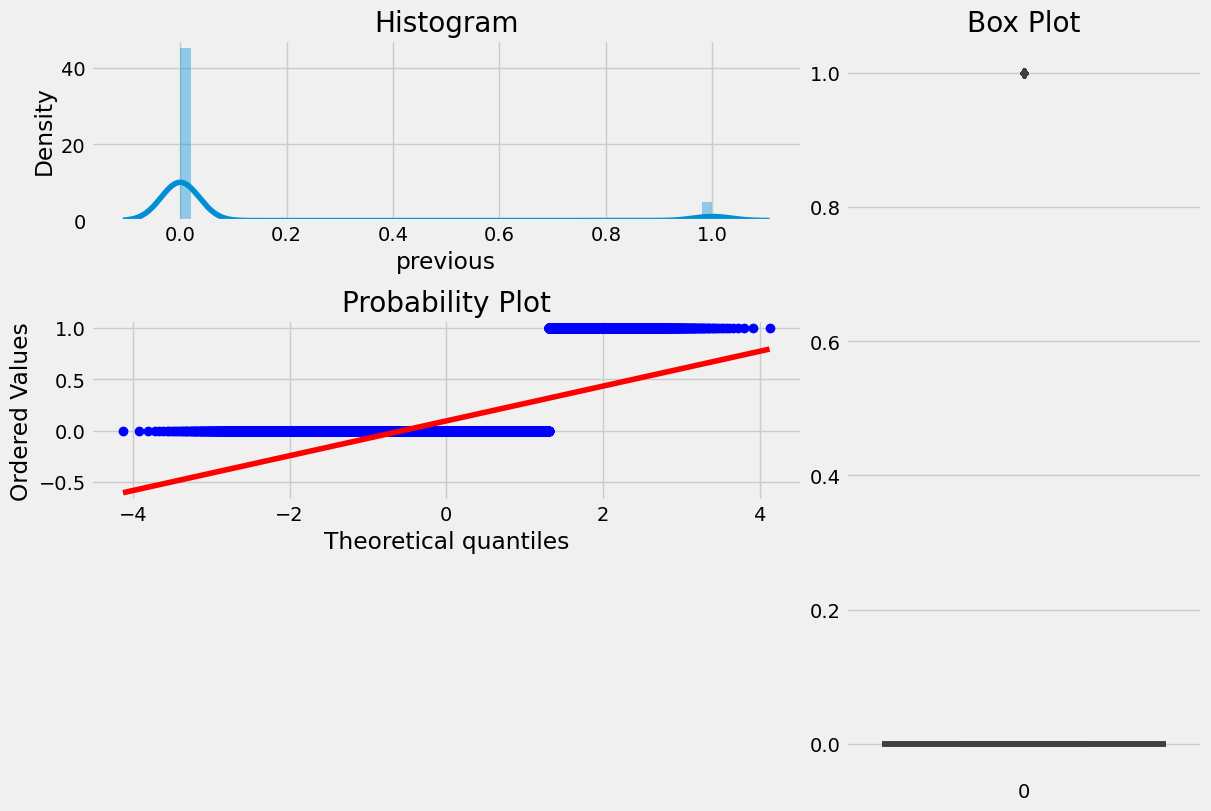

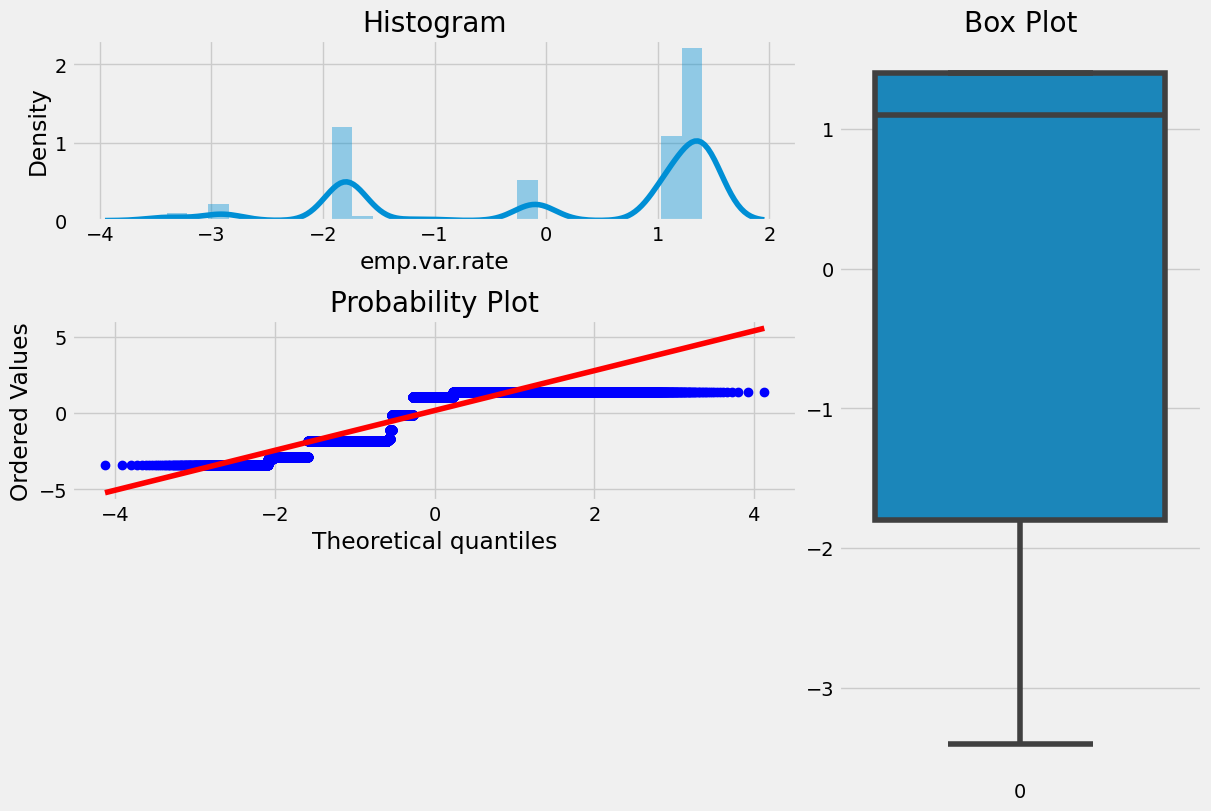

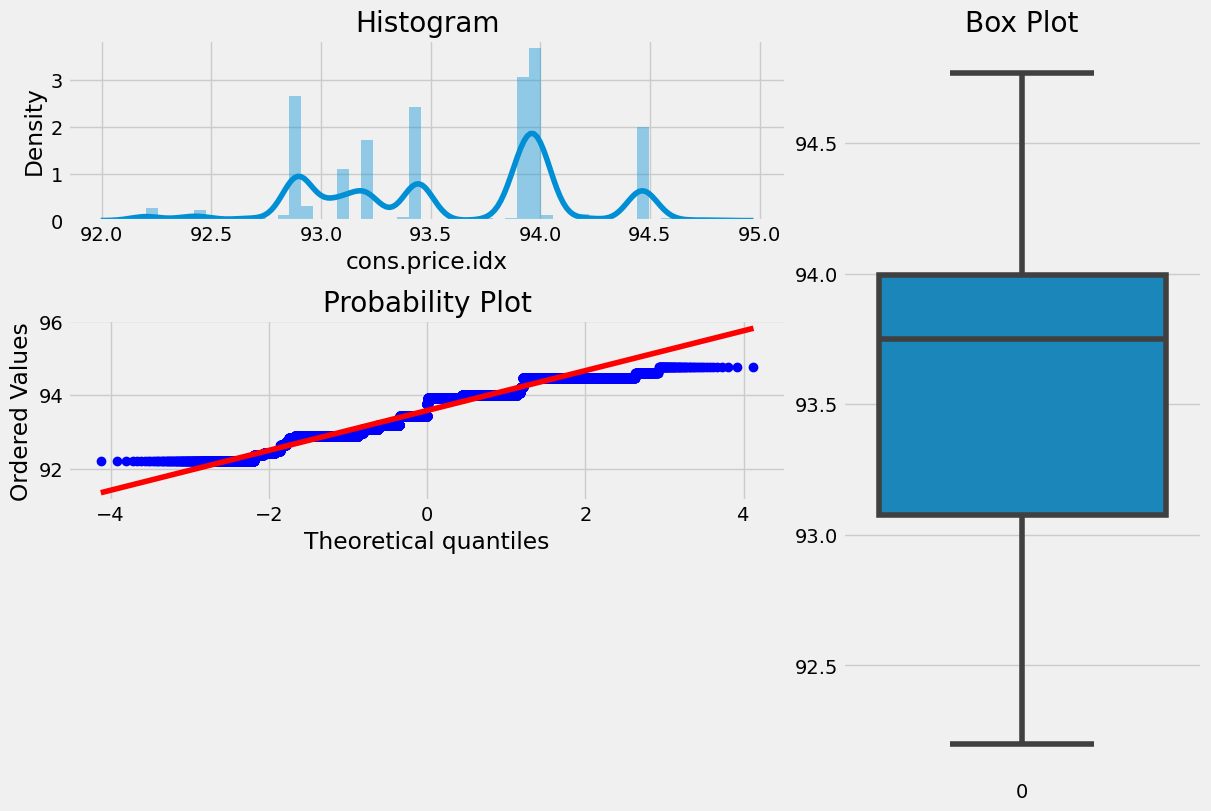

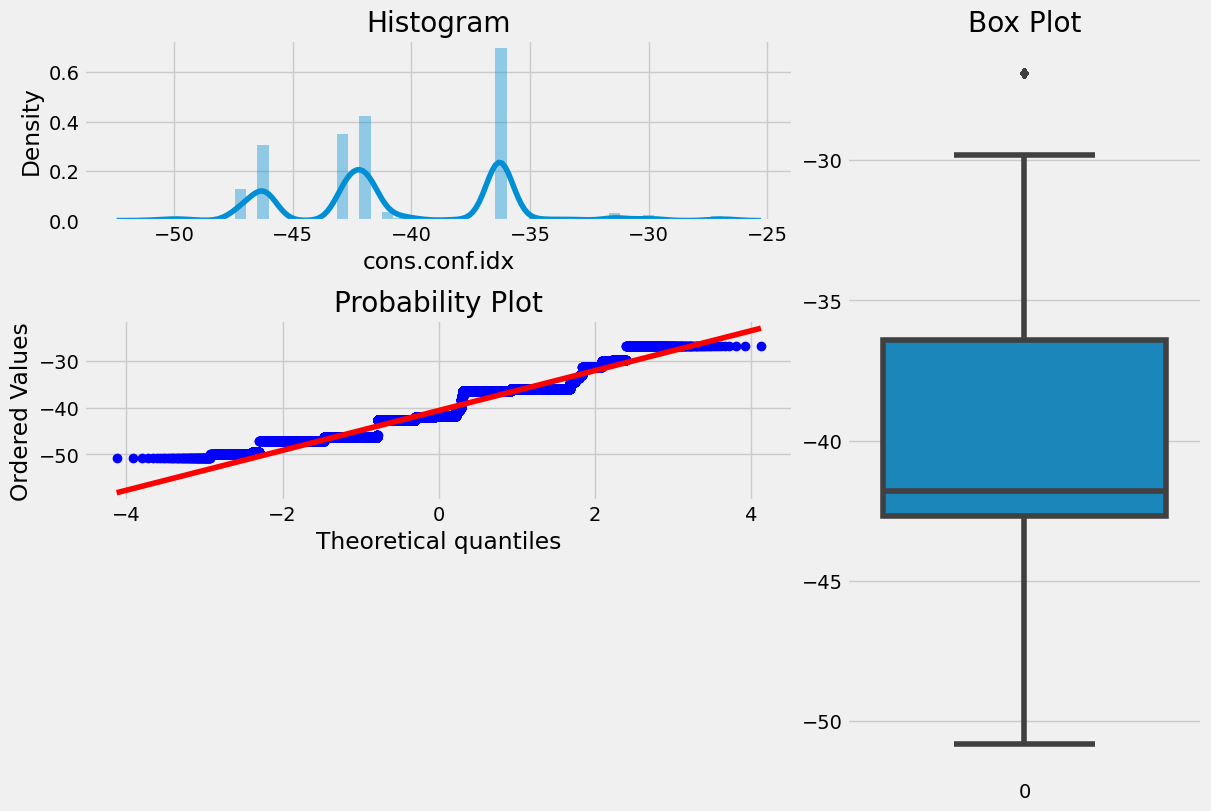

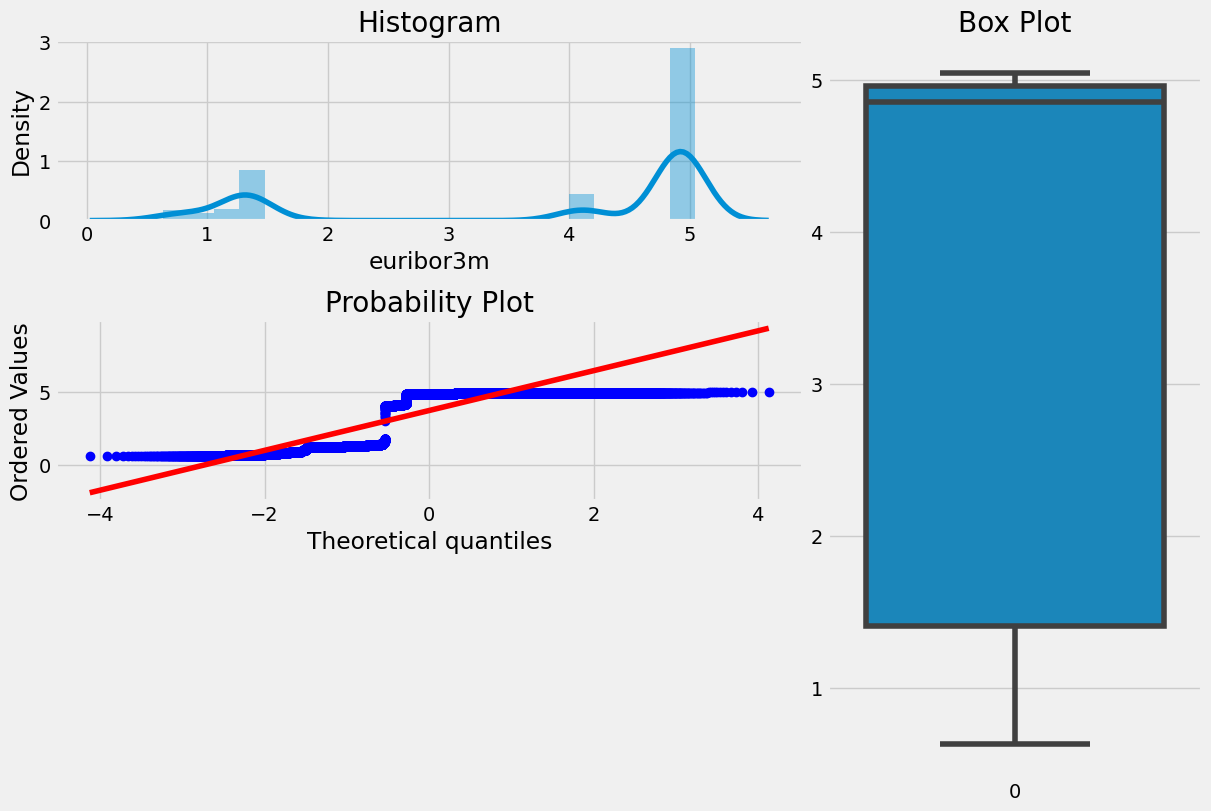

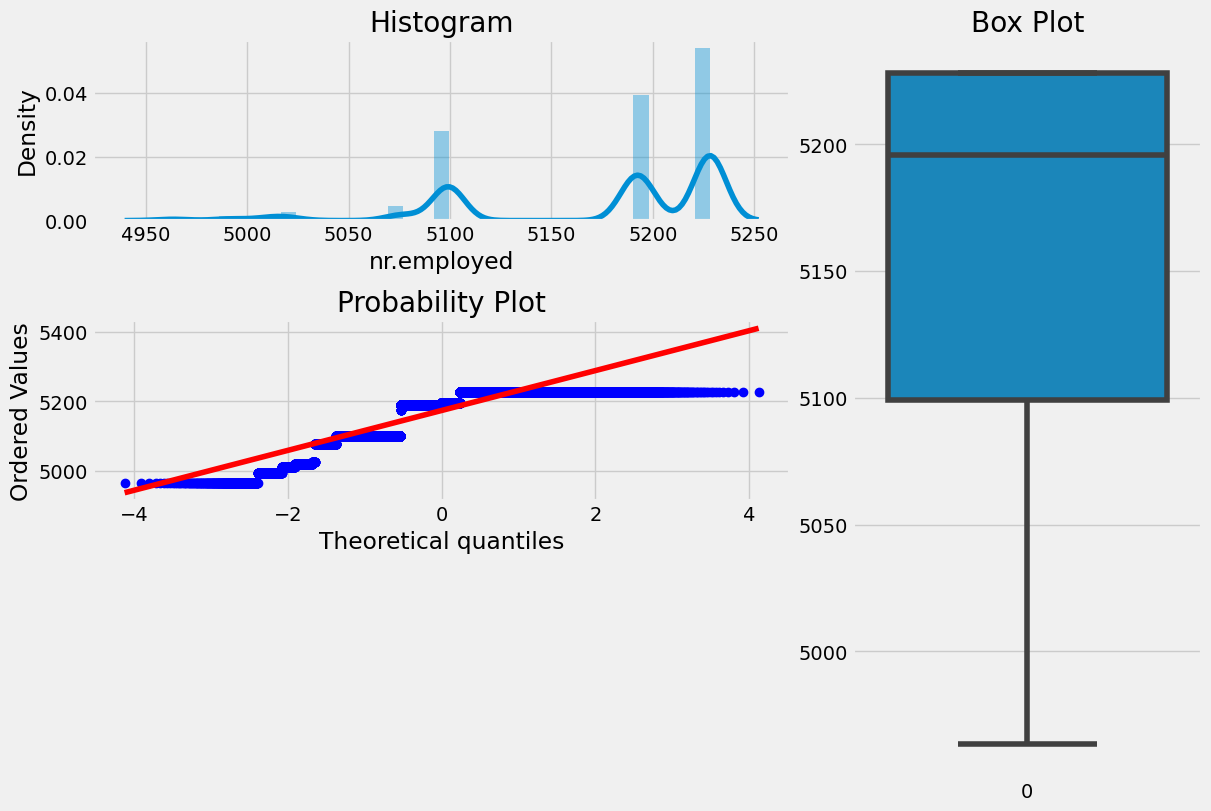

In [15]:
def plotting_3_chart(data, feature):
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot( data.loc[: , feature]  , ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)
    
    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);

for i in numerical_features:
    plotting_3_chart(df , i)
    print('\n\n')

In [16]:
le = LabelEncoder()
for i in categorical_data:
    df[i] = le.fit_transform(df[i])

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,0,1,6,0,0,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37,0,1,6,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [17]:
X = df.drop("y", axis=1)
y = df["y"]

key = X.keys()

In [18]:
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=key)

In [19]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.696502,-0.195354,-0.279558,-1.757249,-0.525878,-1.086692,-0.452687,1.280884,0.777473,-0.717602,0.144289,-0.745379,0.0,-0.325271,0.325271,0.604850,0.732475,0.943745,0.666264,0.26336
1,1.800355,0.915821,-0.279558,-0.346341,1.899781,-1.086692,-0.452687,1.280884,0.777473,-0.717602,-0.442204,-0.745379,0.0,-0.325271,0.325271,0.604850,0.732475,0.943745,0.666264,0.26336
2,-0.276708,0.915821,-0.279558,-0.346341,-0.525878,0.943041,-0.452687,1.280884,0.777473,-0.717602,-0.038990,-0.745379,0.0,-0.325271,0.325271,0.604850,0.732475,0.943745,0.666264,0.26336
3,0.034852,-1.028735,-0.279558,-1.286946,-0.525878,-1.086692,-0.452687,1.280884,0.777473,-0.717602,-0.431731,-0.745379,0.0,-0.325271,0.325271,0.604850,0.732475,0.943745,0.666264,0.26336
4,1.696502,0.915821,-0.279558,-0.346341,-0.525878,-1.086692,2.310546,1.280884,0.777473,-0.717602,0.385170,-0.745379,0.0,-0.325271,0.325271,0.604850,0.732475,0.943745,0.666264,0.26336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37297,-0.380561,-1.028735,-0.279558,1.064567,-0.525878,-1.086692,-0.452687,-0.780711,1.214766,-1.432331,0.107633,-0.170153,0.0,-0.325271,0.325271,-0.845454,2.107492,-2.280666,-1.631480,-3.20276
37298,-0.276708,-1.028735,-0.279558,1.064567,-0.525878,0.943041,-0.452687,-0.780711,1.214766,-1.432331,0.249020,-0.745379,0.0,-0.325271,0.325271,-0.845454,2.107492,-2.280666,-1.631480,-3.20276
37299,0.657970,-0.750941,-0.279558,0.594264,-0.525878,-1.086692,-0.452687,-0.780711,1.214766,-1.432331,0.783148,-0.745379,0.0,-0.325271,0.325271,-0.845454,2.107492,-2.280666,-1.631480,-3.20276
37300,1.696502,0.360234,-0.279558,1.064567,-0.525878,0.943041,-0.452687,-0.780711,1.214766,-1.432331,-0.232742,-0.170153,0.0,-0.325271,0.325271,-0.845454,2.107492,-2.280666,-1.631480,-3.20276


<Axes: >

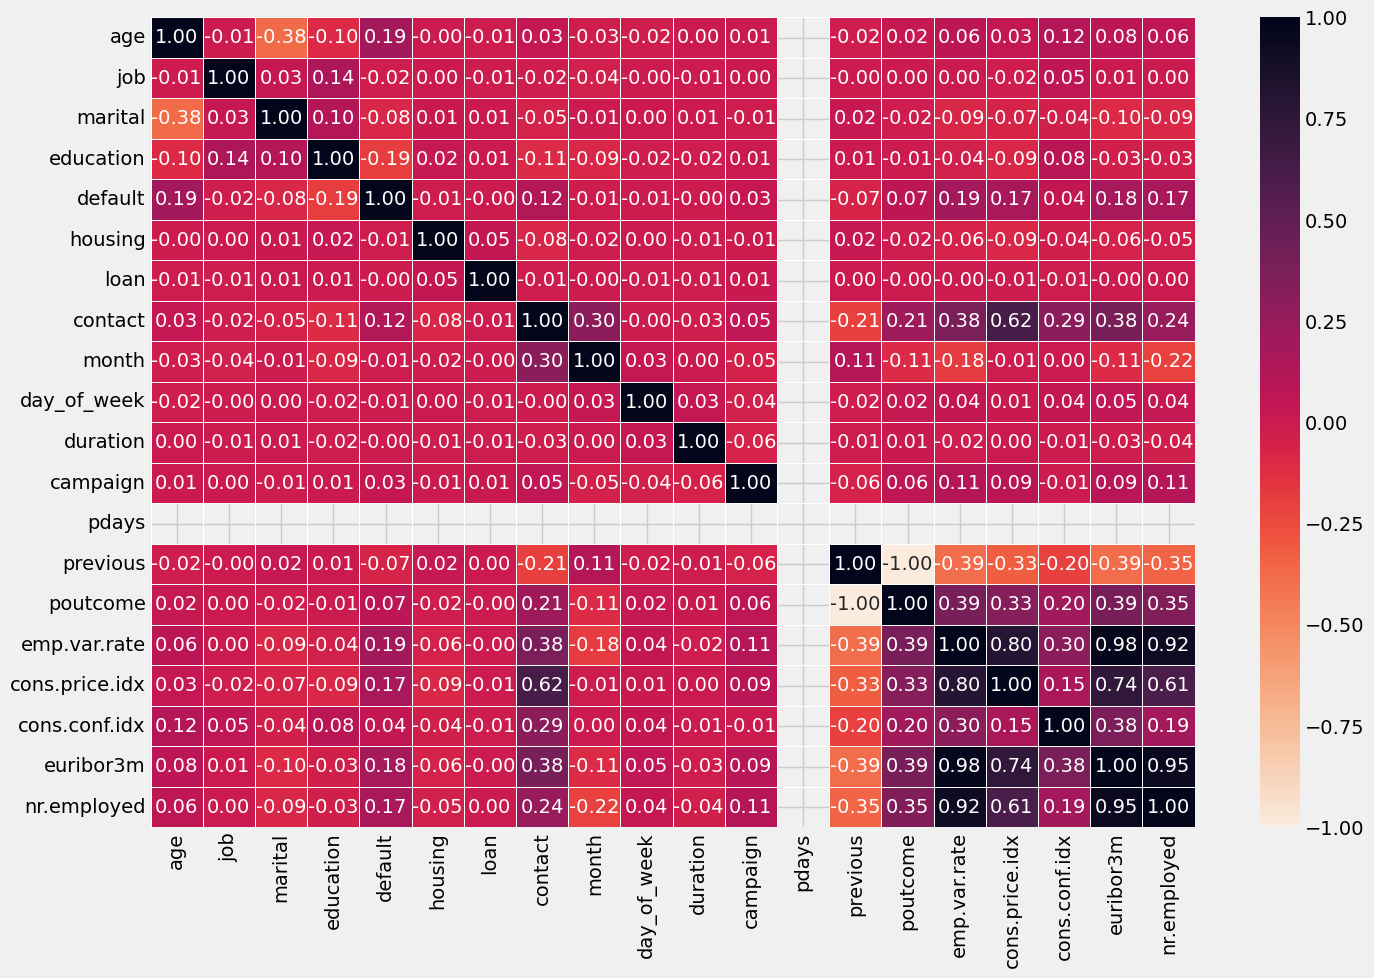

In [20]:
corr = X.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr , annot=True, cmap='rocket_r', linewidths=0.5, fmt='.2f')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = Sequential()

model.add(Dense(128 , activation='relu' , input_dim = X.shape[1]))
model.add(Dense(64 , activation='relu'))
model.add(Dense(32 , activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13057 (51.00 KB)
Trainable params: 13057 (51.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


746/746 [==============================] - 5s 4ms/step - loss: 0.1822 - accuracy: 0.9245 - val_loss: 0.1558 - val_accuracy: 0.9342
Epoch 2/50
746/746 [==============================] - 2s 3ms/step - loss: 0.1624 - accuracy: 0.9278 - val_loss: 0.1512 - val_accuracy: 0.9353
Epoch 3/50
746/746 [==============================] - 3s 4ms/step - loss: 0.1567 - accuracy: 0.9297 - val_loss: 0.1514 - val_accuracy: 0.9332
Epoch 4/50
746/746 [==============================] - 3s 4ms/step - loss: 0.1530 - accuracy: 0.9315 - val_loss: 0.1511 - val_accuracy: 0.9310
Epoch 5/50
746/746 [==============================] - 3s 4ms/step - loss: 0.1493 - accuracy: 0.9314 - val_loss: 0.1500 - val_accuracy: 0.9332
Epoch 6/50
746/746 [==============================] - 3s 4ms/step - loss: 0.1465 - accuracy: 0.9323 - val_loss: 0.1463 - val_accuracy: 0.9353
Epoch 7/50
746/746 [==============================] - 3s 4ms/step - loss: 0.1434 - accuracy: 0.9331 - val_loss: 0.1466 - val_accuracy: 0.9343
Epo

In [25]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


234/234 [==============================] - 1s 3ms/step - loss: 0.4433 - accuracy: 0.9087
Test accuracy: 0.908725380897522


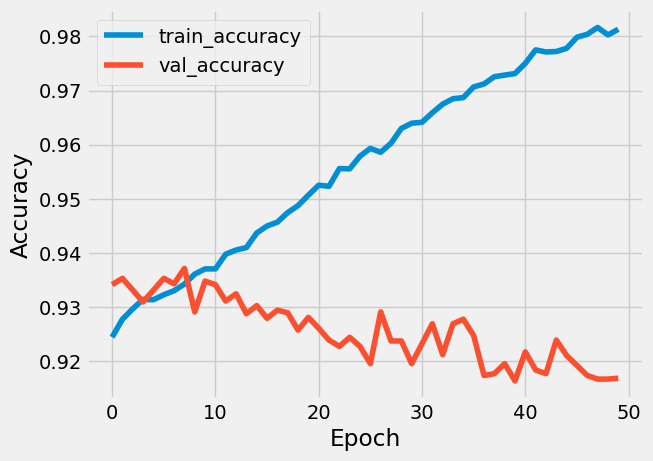

In [26]:
# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
his = pd.DataFrame(history.history)
his.head()

,loss,accuracy,val_loss,val_accuracy
0,0.182244,0.924472,0.155757,0.934160
1,0.162416,0.927782,0.151158,0.935333
2,0.156672,0.929708,0.151434,0.933155
3,0.153021,0.931468,0.151079,0.930977
4,0.149303,0.931384,0.149962,0.933155


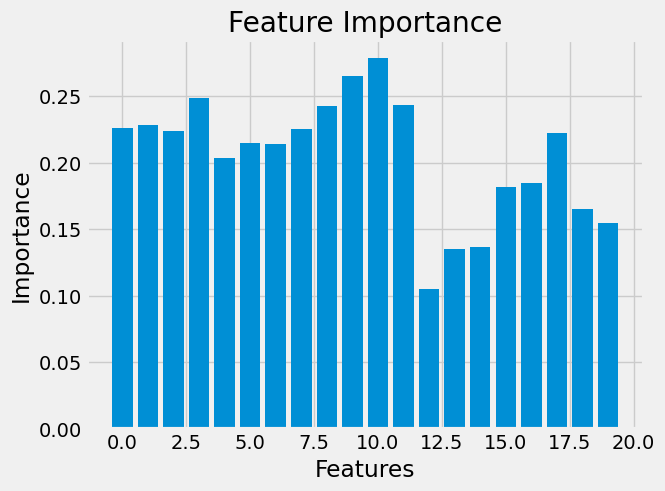

In [28]:
# Extracting feature importance
weights = model.layers[0].get_weights()[0]  # Get weights of the first layer
feature_importance = np.abs(weights).mean(axis=1)  # Calculate mean absolute weights

# Plot feature importance
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()